<img src="images/cs5228-header-title.png" />

# Assignment 1 - Exploratory Data Analysis (EDA) & Clustering

Hello everyone, this assignment notebook covers Exploratory Data Analysis (EDA) and Clustering. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A1_YourName_YourNUSNETID.ipynb** (e.g., **A1_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the Python script file **A1_YourName_YourNUSNETID.py** (e.g., **A1_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Sep 18, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. There is no need to use your full name if it's rather long; it's just important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [2]:
student_id = 'A0223593A'
nusnet_id = 'E0564634'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well documented, but you can use the overview below to double-check that you covered everything.

* **1 Exploratory Data Analysis (EDA) & Data Preparation (25 Points)**
    * 1.1 Removing "Dirty" Records (5 Points)
    * 1.2 Handling Missing (NaN) Values (5 Points)
    * 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (5 Points)
        * 1.3 a) Appropriate Steps (3 Points)
        * 1.3 b) Additional Considerations (2 Points)
    * 1.4 Handling Categorical Attributes (4 Points)
    * 1.5 Basic Facts about a Real-World Dataset (6 Points)
* **2 Clustering (25 Points)**
    * 2.1 Implementing DBSCAN for Noise Detection (8 Points)
        * 2.1 a) Compute Core Points (4 Points)
        * 2.1 b) Compute Noise Points (4 Points)
    * 2.2 Questions about Clustering Algorithms (17 Points)
        * 2.2 a) Interpreting Dendrograms for Hierarchical Clusterings (6 Points)
        * 2.2 b) Comparing the Results of Different Clustering Algorithms (6 Points)
        * 2.2 c) Short Essay Questions (5 Points)

### Setting up the Notebook

In [3]:
# Some magic so that the notebook will reload the external python script file any time you edit and save the .py file;
%load_ext autoreload
%autoreload 2

Making all the required imports:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

np.set_printoptions(precision=3)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A1.py`, you also need to edit the import statement below accordingly.

In [5]:
from A1_IsabellaLu_e0564634 import *
#from A1_BobSmith_e12345678 import * # <-- you well need to rename this accordingly

---

# 1 Exploratory Data Analysis (EDA) & Data Preparation (25 Points)

### 1.1 Removing "Dirty" Records (5 Points)

Assume that you have been tasked to build a regression model to predict the **resale prices of used cars** in Singapore. To this end, you get a dataset containing information about 15,000 past resale transactions, including the following information about the attributes:

* **listing_id**: Unique ID of the listing; an integer number uniquely assigned to each listing. If this code starts with the letter 'C', it indicates a cancellation of the listing and this is an invalid listing.
* **url**: URL of the website where the listing is posted as string value
* **make**: The make/brand of the car as a string value of a valid car make (e.g., "bmw", "honda", "mazda", "toyota", "mercedes-benz").
* **model**: The model of the car as a string value of a valid car model (e.g., "e250", "outlander", "v60", "x1", "qashqai").
* **manufactured**: The year the car has been manufactured as an integer value.
* **type_of_vehicle**: The type of the car as a string value of a valid vehicle type (e.g., "luxury sedan", "mid-sized sedan", "suv", "hatchback").
* **power**: The power of the engine as an integer value in kW (kilowatt)
* **engine_cap**: Size/capacity of the engine as integer value in cc (cubic centimeter)
* **curb_weight**: the weight of the vehicle including a full tank of fuel and all standard equipment in kg (kilogram)
* **no_of_owners**: Number of previous owners as integer value >= 1 (used cars only).
* **mileage**: Mileage of car as integer value in km (kilometer)
* **price**: Resale price of the car in Singapore dollars.

Let's have a first look at the data:

In [6]:
df_cars_dirty = pd.read_csv('data/a1-used-cars-resale-dirty.csv') # panda dataframe

df_cars_dirty.head(100) # shows first 5 rows  # summary of dataframe, including number of non-null entries

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,983884,https://www.sgcarmart.com/listing/983884,nissan,qashqai,2015,suv,85,1197,1285,2,80000,52800
1,1026259,https://www.sgcarmart.com/listing/1026259,volkswagen,golf,2010,sports car,188,1984,1466,6,149000,105800
2,1002033,https://www.sgcarmart.com/listing/1002033,suzuki,vitara,2016,suv,88,1586,1160,1,84000,55800
3,1030109,https://www.sgcarmart.com/listing/1030109,kia,picanto,2007,hatchback,47,1086,852,2,105000,8888
4,1013252,https://www.sgcarmart.com/listing/1013252,porsche,cayenne,2014,suv,193,2967,2185,3,108650,162800
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1029331,https://www.sgcarmart.com/listing/1029331,bmw,530i,2020,luxury sedan,187,1998,1625,1,6800,273800
96,1006727,https://www.sgcarmart.com/listing/1006727,volkswagen,sharan,2017,mpv,162,1984,1790,2,71000,101800
97,1025136,https://www.sgcarmart.com/listing/1025136,mercedes-benz,e200,2017,luxury sedan,135,1991,1605,1,65000,149800
98,1012988,https://www.sgcarmart.com/listing/1012988,toyota,corolla,2009,mid-sized sedan,80,1598,1195,2,113000,49800


In [7]:
print('Number of records: {}'.format(len(df_cars_dirty)))

Number of records: 15000


If you check the dataset against its description as given above -- with the help of `pandas` or by simply inspecting the raw data file -- you will notice that many records are "dirty", meaning they are not in the expected format. Dirty records can negatively affect any subsequent analysis it needs.

**Perform EDA on the Used Cars Resale Price dataset and perform appropriate preprocessing steps to clean the data!**
The preprocessing step for cleaning the data step may include
* the *removal* of "dirty records" or
* the *modification* of "dirty records" records

**Task 1: Identify at least 3 issues** with the dataset that would negatively affect any subsequent analysis, and clean the data accordingly.

**Important:**

* Recall from the lecture that data cleaning often involves making certain decisions. As such, you might come up with different steps than other students. This is OK as long as you can reasonably justify your steps.
* The goal is to preserve as much of the records as possible! So only remove records as part of your data cleaning if it's really necessary (this includes that you should not remove any attributes!). There might be different valid cases, so don't forget to briefly justify your decision.
* For this task, we are **not** trying to identify "noise" (e.g., outliers in the form of suspicious values) or `NaN` values; this will be covered later. Here, we look for records with values not eligible to be used for an analysis because they do not adhere to the data description.

Please provide your answer below. It should list the different issues you have identified and briefly discuss which data cleaning steps you can and/or need to perform to address those issues.

**Your answer:**

1. Having cancelled listing are problematic for the analysis of resale prices in singapore since they do not represent actual transactions, keeping them can lead to bias results. Although they might be useful in times when studying market dynamics, the records -- which are invalid by definition -- are not helpful in the current use case. Hence, I purges all the entries with `listing_id` starting with `C`
2. After inspecting with pandas `.unique()` and `.value_counts()` function, I found out 6 entries in the `type_of_vehicle` have unidentified types marked as `unknown`. Since the missing count is relatively small, it is safe to just remove them from the dataset. 
3. Numeric fields `manufactured`contains values outside their valid ranges. The manufactured year must not exceed the current year (2025). Since there is no additional information to help correct those information, these entries are seen as invalid and removed. 
4. Numeric fields `no_of_owners`contails values outside of valid range, no_of_owners must be at least 1 according to the dataset definition. Since there is no additional information to help correct those information, these entries are seen as invalid and removed. 
5. Entries in `make` have manufacturer names spelled differently, noticably 'mercedez'/'mercedez-benz' and 'rolls'/'rolls-royce'. To clean the data, the shortforms are merged into the complete brand name. 

In [9]:
# Convert to string just in case some values are mixed types

# listing id start with "C" are cancelled 
invalid_ids = df_cars_dirty[~df_cars_dirty['listing_id'].astype(str).str.isdigit()]
print('Number of invalid listing ids: {}'.format(len(invalid_ids)))

invalid_year = df_cars_dirty[(df_cars_dirty['manufactured'] < 1900) | (df_cars_dirty['manufactured'] > 2025)]
print('Number of invalid manufactured year: {}'.format(len(invalid_year)))

invalid_owner = df_cars_dirty[(df_cars_dirty['no_of_owners'] < 1) | (df_cars_dirty['no_of_owners'] > 50)]
print("Numer of invalid owner: {}".format(len(invalid_owner)))

unknown_type = df_cars_dirty[df_cars_dirty['type_of_vehicle'] == 'unknown']
print('Number of unknown vehicle type: {}'.format(len(unknown_type)))

print(sorted(df_cars_dirty['make'].unique()))

mercedez = df_cars_dirty[df_cars_dirty['make'] == 'rolls']
print(len(mercedez))


Number of invalid listing ids: 453
Number of invalid manufactured year: 306
Numer of invalid owner: 455
Number of unknown vehicle type: 6
['alfa romeo', 'alpine', 'aston martin', 'audi', 'austin', 'bentley', 'bmw', 'cadillac', 'chevrolet', 'chrysler', 'citroen', 'cupra', 'daihatsu', 'daimler', 'dodge', 'dongfeng', 'ferrari', 'fiat', 'ford', 'honda', 'hummer', 'hyundai', 'infiniti', 'international', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lotus', 'maserati', 'maxus', 'maybach', 'mazda', 'mclaren', 'mercedes', 'mercedes-benz', 'mg', 'mini', 'mitsubishi', 'mitsuoka', 'morgan', 'nissan', 'opel', 'perodua', 'peugeot', 'porsche', 'proton', 'renault', 'rolls', 'rolls-royce', 'ruf', 'saab', 'seat', 'skoda', 'smart', 'ssangyong', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo']
1


**Task 2: Complete the method `clean` in the `.py` file to actually implement your steps for handling "dirty" records!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [10]:
df_cars_cleaned = clean(df_cars_dirty)

print('After preprocessing, there are now {} records.'.format(df_cars_cleaned.shape[0]))

After preprocessing, there are now 13825 records.


### 1.2 Handling Missing (NaN) Values (5 Points)

Many traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our used cars resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [11]:
df_cars_nan = pd.read_csv('data/a1-used-cars-resale-nan.csv')

df_cars_nan.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1023911,https://www.sgcarmart.com/listing/1023911,toyota,corolla,2009,mid-sized sedan,81,1496,1130.0,3,127450.0,20800.0
1,1022346,https://www.sgcarmart.com/listing/1022346,toyota,estima,2007,mpv,125,2362,1710.0,4,103000.0,52500.0
2,1017880,https://www.sgcarmart.com/listing/1017880,citroen,c3,2018,suv,81,1199,1203.0,1,35000.0,68000.0
3,1022468,https://www.sgcarmart.com/listing/1022468,renault,grand,2015,mpv,81,1461,1539.0,1,80848.0,52800.0
4,1026440,https://www.sgcarmart.com/listing/1026440,mercedes-benz,e200,2009,luxury sedan,135,1796,1615.0,2,116199.0,73800.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here.

**Task 1: Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Please provide your answer in the markdown cell below list all issues concerning `NaN` values and how you would handle them with a brief justification for your approach. Additional (simplifying) guidelines:

* The goal is to preserve as many records in the dataset as possible.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset)
* Ignore more sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.

**Your Answer:**

Using pandas `isna().sum()` to find distribution of NaN values in the dataset and we observe:
```
listing_id            0
url                1503
make                987
model                 0
manufactured          0
type_of_vehicle       0
power                 0
engine_cap            0
curb_weight           0
no_of_owners          0
mileage             741
price               445
dtype: int64
```
From this information we can see that attributes with NaN values are nominal attributes `url` and `make`, and numerical values `mileage` and `price. Each of them has to be dealt with differently. 
- A significant amount of url -- almost 10% is missing. Since url is unique for each entry and not useful as a predictive feature for regression model, I choose to drop the url attribute.
- make is a categorical attribute which is a potentially important feature for predicting price. Strategies like replacing NaN with most common car brands will introduce more bias to the result. So I replace the NaN values with `"Unknown"`. It is possible that model might show corelation between missing brand and resale price.
- Mileage is an important numerical attribute that can contribute to resale price. I fill the missing values with median mileage instead of mean to avoid being affected by extreme values. 
- Data entries with missing resale price are dropped since price is the target for regression. 

**Task 2: Complete the method `handle_nan` in the `.py` file to actually implement your steps for handling `NaN` values!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [13]:
df_cars_no_nan = handle_nan(df_cars_nan)

print('After handling missing values, there are now {} records.'.format(df_cars_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_cars_no_nan.isna().sum(axis=1) > 0).sum()))

After handling missing values, there are now 14555 records.
Number of records with an NaN for any attribute: 0


### 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (5 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaning analysis results.

For this subtask, we use a version of our Used Cars Resale dataset **with no "dirty" records or missing data**! Note that this dataset has a few more attributes: `eco_category`, `transmission`, and `reg_date` (registration date). Let's have a look:

In [15]:
df_cars_others = pd.read_csv('data/a1-used-cars-resale-other.csv')

df_cars_others.head()

,listing_id,url,make,model,manufactured,reg_date,type_of_vehicle,eco_category,transmission,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1004862,https://www.sgcarmart.com/listing/1004862,Lamborghini,gallardo,2011,06-jan-2012,sports car,uncategorized,auto,412,5204,1500,5,49000,362800
1,1004953,https://www.sgcarmart.com/listing/1004953,Mitsubishi,attrage,2016,31-jul-2017,mid-sized_sedan,uncategorized,auto,57,1193,940,2,90000,43800
2,1031276,https://www.sgcarmart.com/listing/1031276,toyota,vios,2018,21-nov-2018,mid-sized sedan,uncategorized,auto,79,1496,1085,1,20270,56666
3,1024287,https://www.sgcarmart.com/listing/1024287,volkswagen,golf,2016,18-nov-2016,hatchback,uncategorized,auto,81,1197,1229,1,60000,54200
4,1023453,https://www.sgcarmart.com/listing/1023453,bmw,216d,2016,24-nov-2016,mpv,uncategorized,auto,85,1496,1480,2,80000,103000


#### 1.3 a) Appropriate Steps (3 Points)

**List at least 4 data cleaning / data preprocessing steps you deem appropriate to apply to the dataset above!** Please provide your answer in the markdown cell below list all steps together with a justification for your decision. Additional (simplifying) guidelines:

* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task is very likely to affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `model` is indeed an existing car model.
* Please do not address the concept of attribute encoding -- that is, the encoding of categorical attributes as numerical attributes -- in this subtask. This comes later.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**

1. Remove duplciates: There are 30 identical duplicates in the dataset shown by `df_cars_others.duplicated().sum()`. They should be removed. 
2. Remove `listing_id` and `url`: They are not contributive to understanding trend and can potentially lead to privacy issues.
3. Fix spelling inconsistancy in `make`: `.unique()` function shows make have inconsitant capital letters like `Alfa Romeo` and `alpha romeo`. To fix this, replace all capital letters with lowercase lettrs for this attribute.
4. Handle extreme case for `no_of_owners`: There are 446 entries with 9999 number of owners. Since the aim is to preserve as muc data as possible, replace the extreme cases with the median value of this column. 
5. Replace typo in `manufactured` year: after inspection with `df_cars_others['manufactured'].value_counts().sort_index()`, it is discovered that there are several sales with manufactuered year from 2105 to 2121. The numberes are very similar to the common values and very likely to be typo(e.g. 2005 mistakenly typed as 2105 by the input person). Hence replacing those years with their (current value - 100) would help us preserve more useful data. 
6. Remove `eco_category` attribute: `df_cars_others['eco_category'].unique()` shows that this attribute only have 1 value:  'uncategorized' which does not help with any pattern conclusion. This column is meaningless and should be removed.
7. Merge spelling inconsistancy in `type_of_vehicle` such as 'luxury sedan' and 'luxury_sedan'.

In [26]:
# print all unique values of eco_category
print(df_cars_others['eco_category'].unique())
# rank in alphabetical order
print(sorted(df_cars_others['make'].unique())) # There are caps and non-caps makes, should be unified

# check for duplicated rows
print('Number of duplicated rows: {}'.format(df_cars_others.duplicated().sum()))

# df_cars_others['no_of_owners'].hist(bins=20)
print(df_cars_others['no_of_owners'].value_counts())

# find outliers in manufactured year
# print(df_cars_others['manufactured'].value_counts().sort_index())

df_cars_others['type_of_vehicle'].unique()


['uncategorized']
['Alfa Romeo', 'Aston Martin', 'Audi', 'Austin', 'Bentley', 'Bmw', 'Cadillac', 'Chevrolet', 'Citroen', 'Daihatsu', 'Ferrari', 'Ford', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lotus', 'Maserati', 'Mazda', 'Mclaren', 'Mercedes', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Perodua', 'Peugeot', 'Porsche', 'Proton', 'Renault', 'Rolls', 'Rolls-Royce', 'Ruf', 'Seat', 'Skoda', 'Ssangyong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'alfa romeo', 'alpine', 'aston martin', 'audi', 'bentley', 'bmw', 'chery', 'chevrolet', 'chrysler', 'citroen', 'cupra', 'daihatsu', 'daimler', 'dodge', 'dongfeng', 'ferrari', 'fiat', 'ford', 'honda', 'hummer', 'hyundai', 'infiniti', 'international', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lotus', 'maserati', 'maxus', 'maybach', 'mazda', 'mclaren', 'mercedes', 'mercedes-benz', 'mg', 'mini', 'mitsubishi', 'mitsuoka', 'morgan', 'nissan', 'o

array(['sports car', 'mid-sized_sedan', 'mid-sized sedan', 'hatchback',
       'mpv', 'luxury sedan', 'stationwagon', 'suv', 'luxury_sedan',
       'sports_car', 'bus/mini_bus', 'unknown', 'van'], dtype=object)

#### 1.3 b) Additional Considerations (2 Points)

So far, we handled "dirty" records, missing values, and other types of (arguably) straightforward EDA/preprocessing steps. This means that we performed important steps towards ensuring a minimum level of data quality to, in turn, enable a successful data analysis and meaningful results. However, this does not mean that our dataset is now free of any noise.

**Briefly discuss what other kind of noise our dataset might still contain?** Include a brief explanation if and how we could identify and handle these instances of noisy data -- if possible in a meaningful way. There is no need to analyze and check the dataset to find any examples. This question is mainly to motivate some additional thinking.

**Your Answer:**

Max mileage: 386000


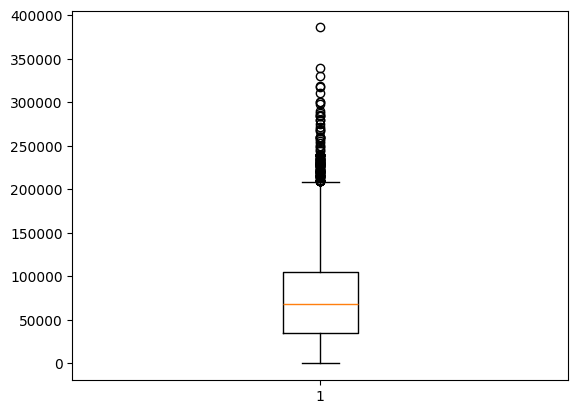

In [29]:
# boxplot of mileage    
plt.boxplot(df_cars_others['mileage'])
# find max mileage
print('Max mileage: {}'.format(df_cars_others['mileage'].max()))

The dataset may contain **extreme outliers** in numerical attributes such as mileage and price. For example, one accord sports car shows a mileage of 38600 km, which is unusually high compared to most records. Such values can dominate regression coefficients and reduce model accuracy. To identify outliers, boxplots can be used. Clear anomalies and cap values should be removed. 

Market conditions that change over time and can introduce **temporal noise**. For example, a car manufactured in 2011 with a registration date in 2012 will have a very different price trend compared to one manufactured in 2011 but registered in 2021. Mixing such records without considering time effects introduces temporal noise. This can be identified by comparing manufactured with reg_date, or analyzing resale price trends by year. To handle this issue, either restrict the dataset to a consistent time window or create new features such as “car age” or “listing year” to explicitly account for temporal effects.


### 1.4 Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture, and also talked about [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) in the tutorial; you can and should also look into other encoding techniques.

For this task, we assume the same dataset file used in 1.3 (`a1-used-cars-resale-others.csv`).

**Briefly(!) discuss how you would handle each categorical attribute and justify why!** Handling a categorical attribute means
* to drop a categorical attribute *or*
* to encode it into a numerical representation *or*
* to otherwise transform it into a numerical attribute

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

In [16]:
# print count of unique values for each attribute
for col in df_cars_others.columns:
    print(f'{col}: {df_cars_others[col].nunique()} unique values')
    

listing_id: 14926 unique values
url: 14926 unique values
make: 109 unique values
model: 526 unique values
manufactured: 45 unique values
reg_date: 3471 unique values
type_of_vehicle: 13 unique values
eco_category: 1 unique values
transmission: 2 unique values
power: 258 unique values
engine_cap: 228 unique values
curb_weight: 645 unique values
no_of_owners: 7 unique values
mileage: 5179 unique values
price: 2660 unique values


- `make`: target encoding to replace each brand with average resale price, avoiding parameter explosion 
- `model`: target encoding for efficiency and avoiding high-dimension matrix
- `type_of_vehicle`: label encoding, since only 13 different values [0-12] can be assigned to the different labels
- `eco_category`: drop since only 1 value, no variance 
- `transmission`: Label/binary Encoding, value encodes as {Automatic = 1, Manual = 0}.

### 1.5 Basic Facts about a Real-World Dataset (6 Points)

The following tasks are about getting basic insights into the Used Cars Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a different dataset file here. Note that this file also contains 15,000 listings of used cars but does **not** contain any "dirty" records. This is to ensure that everyone uses the same data.

If you think this data file may contain "dirty" records, you can safely ignore them. Please do not modify the data for this task!

In [18]:
df_cars_facts = pd.read_csv('data/a1-used-cars-resale-facts.csv')

df_cars_facts.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1019096,https://www.sgcarmart.com/listing/1019096,mitsubishi,evolution,2008,sports car,206,1998,1550,3,82222,128888
1,946934,https://www.sgcarmart.com/listing/946934,porsche,cayenne,2011,suv,245,2995,2315,4,131000,132000
2,1029652,https://www.sgcarmart.com/listing/1029652,audi,a5,2018,luxury sedan,140,1984,1535,2,43000,139800
3,1004270,https://www.sgcarmart.com/listing/1004270,audi,rs,2018,stationwagon,331,2894,1790,1,28150,299900
4,1008439,https://www.sgcarmart.com/listing/1008439,subaru,impreza,2007,mid-sized sedan,70,1597,1280,2,140000,37938


**Please complete the table below by answering the 8 given questions!** Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

This is a markdown cell. Please fill in your answers for (1)~(6).

| No. | Question                                                                                               	| Answer   	|
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 1)  | How many Toyota Corolla (manufactured before 2010) have been sold?  | 141 |
| 2)  | What are the top-3 most sold car makes (give the car make and the number of sales)? | mercedes-benz(2176), toyota(2116), honda(2078) |
| 3)  | Which SUV car model has been sold the most (give the model and the number of sales)? | vezel(397) |
| 4)  | Which car make generated the highest overall sale when only considering low-powered cars, i.e., with power $ \leq$ 60 (give the car make and the total sale)? | toyota 89800 |
| 5)  | Which midsize sedan has the highest *power-to-engine_cap* ratio (give, the make, model, year of manufacturing, and power-to-engine_cap ratio (2 decimal precision))?                                                    	| bmw i8 2017 0.18 |
| 6)  | What is the correlation between the resale *price* and *mileage*, and between resale *price* and *engine_cap*? Use the Pearson correlation as metric. | -0.39, 0.65 |

**Complete the method `extract_facts` in the `.py` file to actually extract the facts!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

**Note:** You can simply use simple print statements that somehow show the result you entered into the table above. You do not have to ensure any specific output. It should only *somehow* be possible to match the answers you have added to the table above to the output of the code cell.

In [19]:
extract_facts(df_cars_facts)

Number of records after cleaning listing_id: 15000
1. Number of toyota corolla manufactured before 2010: 141
2.  make
mercedes-benz    2176
toyota           2116
honda            2078
Name: count, dtype: int64
3.  model
vezel    397
Name: count, dtype: int64
4.  make     toyota
price     89800
Name: 4316, dtype: object
5.  bmw i8 2017 0.18
6. Correlation between price and mileage: -0.39
   Correlation between price and engine_cap: 0.65


---

## 2 Clustering (25 Points)

### 2.1 Implementing DBSCAN for Noise Detection (8 Points)

In the lecture, we covered the original algorithm of DBSCAN, which you can also find on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN). While not difficult to implement, it takes quite a couple of lines of codes to do so. For this assignment, however, we are only interested in the points of a dataset that DBSCAN considers noise (as illustrated below; the red dots in the next plot). This includes that we do not have to care about

* how many clusters there are (the plot below hints at 3 clusters but it does not matter) *and*
* which non-noise points (the grey dots in the plot below) belong to which cluster

**Your task is to implement a modified/simplified version of DBSCAN to find all noise points in a dataset!** The skeleton of method `get_noise_dbscan()` you need to complete is found in the file `A2.py` (before the appropriate renaming). The method takes data matrix `X` as well as the two basic parameters `eps` and `min_samples` as input parameters; we use the same naming as scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  The output should be 2 lists of indices: (a) one containing the indices of all *core points* and (b) one containing the indices of all *noise points* in input dataset X.

**Important:**
* We only split this task into 2.1 a) and 2.1 b) to have intermediate results you can check for correctness (and potentially to better allow for partial marking). Our reference solutions first finds all core points and uses this information to find all noise points; hence the 2 separate code blocks for you to complete.
* However, if you have a better/faster/shorter/cooler/etc. solution, you are more than welcome to implement it and ignore the intermediate result of finding all core points. Only the result from 2.1 b) is important. This also means that you can ignore 2.1 a) and still get full marks if you correctly identify all noise points.
* If you have an alternative solution, please make sure that the method still returns the 2 output parameters `(core_point_indices, noise_point_indices)`. If you do not need to explicitly identify the core points, you can simply return `None` for `core_point_indices`.
* You can import any method `numpy`, `scipy`, `sklearn`, or `pandas` has to offer -- except for any ready-made implementation of DBSCAN, of course :). Please add any imports to the code cell at the top with the other imports. Hint: We already imported [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) for you.

We will benchmark your implementation as part of our Little Competitions to see whose solution is the fastest.

#### Dataset Preparation (nothing for you to do here; just run the following code cells)

In [20]:
X_dbscan_toy = pd.read_csv('data/a1-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


Now we can run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset. Here we use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

In [21]:
dbscan_clustering = DBSCAN(eps=0.1, min_samples=10).fit(X_dbscan_toy)

The points that are noise points are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise as follows:

In [22]:
cluster_point_indices = np.argwhere(dbscan_clustering.labels_ >= 0).squeeze()
noise_point_indices = np.argwhere(dbscan_clustering.labels_ < 0).squeeze()

print('The indices of the points labeled as noise are: {}'.format(noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 39 43 46 51 65]


Of course, we can also plot the results. Note that the figure below only highlights the points labeled as noise as red triangles; all points belonging to *some* clusters are in grey points (note that we do not care to which exact cluster these points belong).

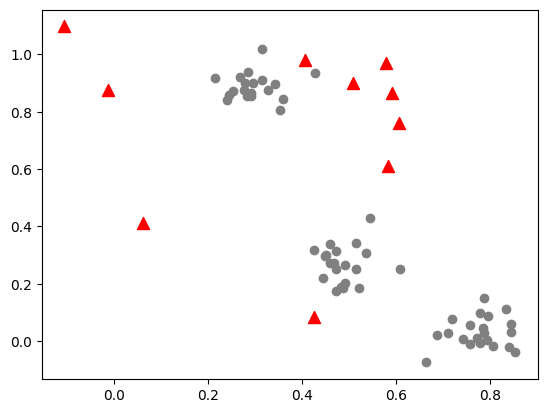

In [23]:
plt.figure()
plt.scatter(X_dbscan_toy[cluster_point_indices,0], X_dbscan_toy[cluster_point_indices,1], c='grey')
plt.scatter(X_dbscan_toy[noise_point_indices,0], X_dbscan_toy[noise_point_indices,1], c='red', marker='^', s=75)
plt.show()

Summing up, the red dots in the plots we define as noise or outliers as they are very dissimilar to the other data points. In practice, we would likely remove those noise points, treat them separately, or maybe perform additional preprocessing steps to potentially "denoise" the dataset. However, the steps of choice generally depend heavily on the exact data mining task. Here, we focus on the identification of noise points.

#### 2.1 a) Compute Core Points (4 Points)

As mentioned above, our reference solution first computes all core points. If you follow this approach, complete the respective part in the code of method `get_noise_dbscan()`. Some hints:
* Recall that we do not care to which cluster a core point belongs to, only that it is a core point in *some* cluster
* Have a look at method [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html); it might make your life easier.

In [24]:
my_core_point_indices, _ = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of core points: {}\n'.format(len(my_core_point_indices)))
print('The first 25 indices of the points labeled as core points:\n{}'.format(sorted(my_core_point_indices)[:20]))

Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]


The output of previous code cell should look like:
    
```
Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
```

Note that `0`, `4`, and `27` should be missing from this list since [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) told us that these points are noise. Of course, also the border points are missing here, but [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) does not return those explicitly.

#### 2.1 b) Compute Noise Points (4 Points)

Knowing the core points is useful but only an intermediate step. Now it is time to complete the method `get_noise_dbscan()` to compute the indices of all noise points in `X`. Again, our reference solution uses `core_point_indices` to accomplish this. If your implementation does not require the information about core points but returns the correct `noise_point_indices` then this is perfectly fine!

In [25]:
_, my_noise_point_indices = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of noise points: {}\n'.format(len(my_noise_point_indices)))
print('The indices of all points labeled as noise points:\n{}'.format(sorted(my_noise_point_indices)))

Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]


The output of previous code cell should look like:

```
Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]
```

Since we used the same values for `eps` and `min_samples`, this result should match the output we saw earlier when we used scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over the toy dataset.

### 2.2 Questions about Clustering Algorithms

#### 2.2 a) Interpreting Dendrograms for Hierarchical Clusterings (6 Points)

We saw in the lecture that dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering using AGNES (or any other hierarchical clustering technique). Properly interpreting is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each dataset contains 30 data points, each with two dimensions.

<img src="images/a1-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendograms show the clustering using **AGNES with Single Linkage** for the 6 datasets above, but in a random order.

<img src="images/a1-agnes-dendrogram-labeled.png">

**Find the correct combinations of datasets and dendrograms** -- that is, find for each dataset the dendrogram that visualizes the clustering using AGNES with Single Linkage! Give a brief explanation for each decision! Complete the table below!

**Your Answer:**

| Dataset | Dendrogram | Brief Explanation |
| ---  | ---   | ---                  |
| **A**    | 6 | A group of relatively close points and 2 far outliers, shown in dendrograms as the last 2 points joining very late |
| **B**    | 1 | Most points have no distance (overlapping), with outliers having increasing distance from cluster, shown by the slop shape in dendrogram|
| **C**    | 5 | One dominent cluster and a single outlier = circle shape |
| **D**    | 3 | Two tight clusters, one tighter and one slightly more distributed represents the 2 arcs |
| **E**    | 2 | Points are relatively scattered , indicated by higher y-axis values in the dendrograms |
| **F**    | 4 | Three tight clusters, 2 of them closer together from the other |

#### 2.2 b) Comparing the Results of Different Clustering Algorithms (6 Points)

The figure belows shows the 6 different clusterings A-F, each computed over a dataset of 8 unique data points $x_1 x_2, ..., x_8$. The datasets are independent from each other for the 6 clusterings. Each clustering contains 3 clusters are represented by the table. A `1` in the result table indicates that the corresponding data point is part of the corresponding cluster. For example, in Clustering A, the `1` in the bottom-left cell indicates that data point $x_8$ is part of Cluster $C_1$.

**Addtional constraints:**

* For K-Means and DBSCAN, the 3 cluster $C_1$, $C_2$, and $C_3$ are the **only** clusters; for AGNES you can assume there might be **more** clusters in the hierarchy
* For DBSCAN, the input parameter for the minimum number of neighboring points is  $MinPts \geq 2$

<img src="images/a1-clustering-comparison.png">

**For each clustering, decide which algorithm (K-Means, DBSCAN, AGNES) can have produced the clustering!** Use the table below for the answer. If an algorithm could have produced a clustering, just write *OK* in the respective cell of the table. If an algorithm could not have produced a clustering, enter a brief explanation into the respective table cell.

**Your Answer:**

|  | K-Means | DBSCAN       | AGNES |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| **Clustering A**  | Empty clusters not allowed | OK | Not possible to have empty cluster with dendrogram cut
| **Clustering B**  | Overlapping clusters | Overlapping Clusters | OK
| **Clustering C**  | Unassigned point, Overlapping Clusters | Overlapping Clusters | OK
| **Clustering D**  | Unassigned points | OK | OK
| **Clustering E**  | OK | cluster size < MinPts | OK
| **Clustering F**  | Overlapping clusters | Overlapping Clusters |OK

#### 2.2 c) Short Essay Questions (5 Points)

Assume you have a dataset `X`, run DBSCAN, and get a clustering that contains a set of clusters and some noise points (there's no need to be more precise; it's only important that you don't get just noise). Let's also assume you create a new dataset `X_new` simply by shuffling `X` (i.e., randomly change the order of data points in the dataset); no other changes. Now you run DBSCAN with the *same* parameters as before over `X_new` and get a different clustering, i.e., most of the clusters are not exactly the same as before.

**What does this information tell about the dataset and clustering? (3 Points)** This may include a brief discussion how changing the parameters of DBSCAN will likely affect the results.

**Your Answer:**

The fact that DBSCAN gives different results after simply shuffling the data means the dataset has ambiguous cluster structure and low density contrast among the points. 
Many points are scattered relatively loosely on density threshold (border points). This makes the clustering unstable and sensitive traversal order which influence whether they are treated as part of one cluster, another, or as noise. 
Clusters are also not well separated, making assignment of non-core points to clusters subject to traversal order. 

If the DBSCAN parameters were adjusted, the results would likely change significantly: increasing eps would connect more points and merge clusters, while decreasing eps or increasing MinPts would cause more points to be treated as noise and clusters to fragment.

In the lecture, we used the Euclidean Distance between data points in centroids to perform the Lloyd's algorithm. However, there are other distance metrics such as the [Manhatten Distance](https://en.wikipedia.org/wiki/Taxicab_geometry) or the [Minkowski Distance](https://en.wikipedia.org/wiki/Minkowski_distance). Can we use those or similar metrics instead of the Euclidean Distance? Give a **brief** justification for your answer!

**Your Answer**

Yes, in principle we can use other distance metrics such as Manhattan or Minkowski in place of Euclidean distance in Lloyd’s algorithm, because the algorithm only requires a way to measure distances between points and centroids. However, the choice of metric affects both the geometry of the clusters and the centroid update rule. Euclidean is most common because the mean is the exact minimizer of squared Euclidean distances, which makes the algorithm simple and efficient.
If we switch to Manhattan distance, the median becomes the better representative. This leads to variants such as K-Medians. Similarly, with general Minkowski distances, the definition of the centroid may need to be adapted. These alternatives are useful when the data lie on grids, when different axes have more importance, or when robustness to outliers is required since Manhattan is less sensitive to extreme values compared to Euclidean. Those metrics can be used, but only if we also adjust the centroid calculation to match, and the results will differ depending on the data characteristics and the goals of clustering